<a href="https://colab.research.google.com/github/KIVILCIIM/Data-Science/blob/main/PCA_KernelPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA ve Kernel PCA Karşılaştırma Örneği

Veri setinin çok iç içe geçtiği durumlarda PCA yetersiz kalabilir.

In [2]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split


x,y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, random_state=0)

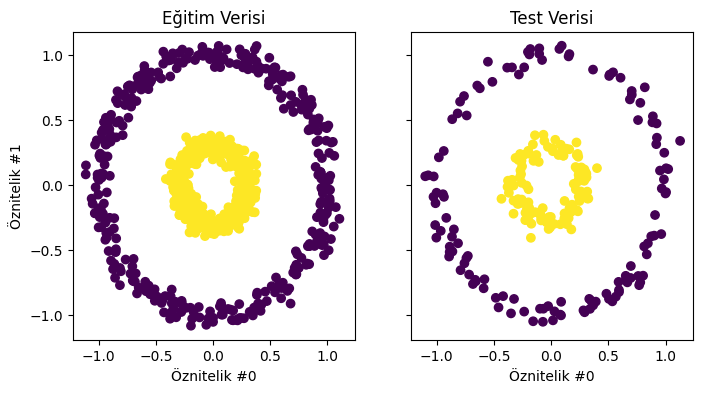

In [9]:
import matplotlib.pyplot as plt
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(x_train[:, 0], x_train[:,1], c=y_train)
train_ax.set_ylabel("Öznitelik #1")
train_ax.set_xlabel("Öznitelik #0")
train_ax.set_title("Eğitim Verisi")


test_ax.scatter(x_test[:, 0], x_test[:,1], c=y_test)
test_ax.set_xlabel("Öznitelik #0")
_ = test_ax.set_title("Test Verisi")


In [10]:
from sklearn.decomposition import PCA, KernelPCA

pca= PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)
x_test_pca = pca.fit(x_train).transform(x_test)
x_test_kernel_pca = kernel_pca.fit(x_train).transform(x_test)

Text(0.5, 1.0, 'Test verisinin\n Kernel PCA ile Projeksiyonu')

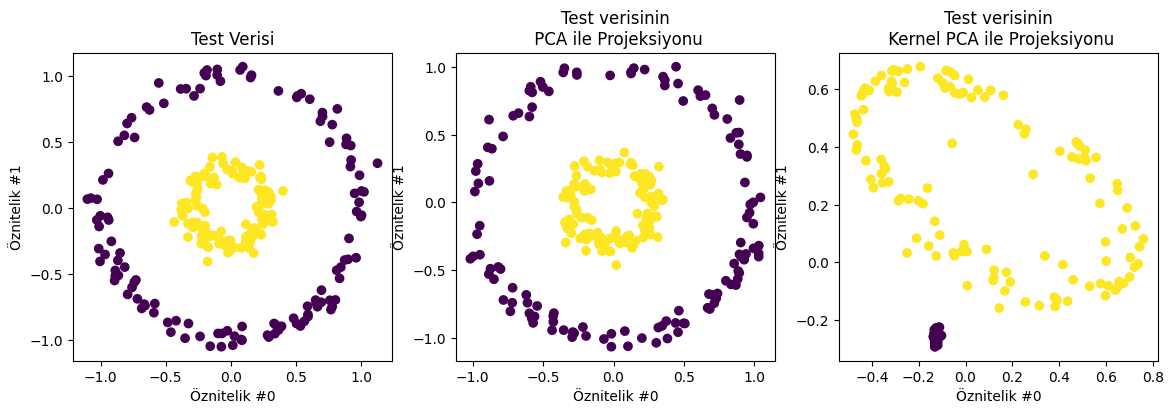

In [13]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4))
orig_data_ax.scatter(x_test [:, 0], x_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Öznitelik #1")
orig_data_ax.set_xlabel("Öznitelik #0")
orig_data_ax.set_title("Test Verisi")

pca_proj_ax.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Öznitelik #1")
pca_proj_ax.set_xlabel("Öznitelik #0")
pca_proj_ax.set_title("Test verisinin\n PCA ile Projeksiyonu")

kernel_pca_proj_ax.scatter(x_test_kernel_pca[:, 0], x_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Öznitelik #1")
kernel_pca_proj_ax.set_xlabel("Öznitelik #0")
kernel_pca_proj_ax.set_title("Test verisinin\n Kernel PCA ile Projeksiyonu")

In [15]:
# reconstruction - geri buluşturma
x_reconstructed_pca = pca.inverse_transform(pca.transform(x_test))
x_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(x_test))

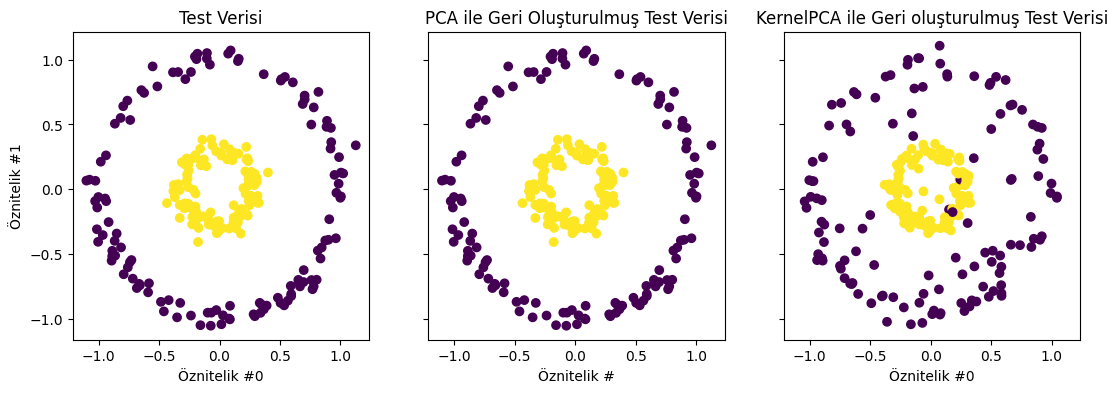

In [16]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4))

orig_data_ax.scatter(x_test [:, 0], x_test[:, 1], c = y_test)
orig_data_ax.set_ylabel("Öznitelik #1")
orig_data_ax.set_xlabel("Öznitelik #0")
orig_data_ax.set_title("Test Verisi")

pca_back_proj_ax.scatter(x_reconstructed_pca[:, 0], x_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Öznitelik #")
pca_back_proj_ax.set_title("PCA ile Geri Oluşturulmuş Test Verisi")

kernel_pca_back_proj_ax.scatter(
    x_reconstructed_kernel_pca[:,0], x_reconstructed_kernel_pca[:,1], c=y_test)

kernel_pca_back_proj_ax.set_xlabel("Öznitelik #0")
_ = kernel_pca_back_proj_ax.set_title("KernelPCA ile Geri oluşturulmuş Test Verisi")